<h1 style="font-family: 'Times New Roman'; font-size: 36px; text-align: center;">Fake News Prediction</h1>

<br><h2 style="font-size: 28px; text-align: center; color: red">Importing Modules</h1>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

from sklearn.utils import resample
import contractions
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier        #Random Forest Classifier
from sklearn.neural_network import MLPClassifier        #Multi-layer Perceptron (MLP) Classifier
from sklearn.linear_model import PassiveAggressiveClassifier        #Passive Aggressive Classifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

<br><h2 style="font-size: 28px; text-align: center; color: red">Data Preprocessing</h1>

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Importing File<i>

In [21]:
df=pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Dropping Unnecessary Columns<i>

In [22]:
df=df.drop(columns=["Unnamed: 0"])
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Renaming Labels<i>

In [23]:
df.loc[df['label']=='FAKE', ['label']]=1
df.loc[df['label']=='REAL', ['label']]=0
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Data-Type Correction<i>

In [24]:
df.dtypes

title    object
text     object
label    object
dtype: object

In [25]:
df=df.astype({'title':'string', 'text':'string', 'label':int})
df.dtypes

title    string
text     string
label     int32
dtype: object

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Checking Null Values<i>

In [26]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Removing Duplicate Values<i>

In [27]:
df.duplicated().sum()

29

In [28]:
df=df.drop_duplicates()
df.duplicated().sum()

0

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Undersampling<i>

In [29]:
df['label'].value_counts()

0    3154
1    3152
Name: label, dtype: int64

In [30]:
x=df.loc[df['label']==0]
y=df.loc[df['label']==1]
x=resample(x, n_samples=3152)
df=pd.concat((x, y))
df['label'].value_counts()

0    3152
1    3152
Name: label, dtype: int64

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Shuffling<i>

In [31]:
df=df.sample(frac=1)
df.head()

,title,text,label
2783,Why The U.S. Presidential Election Has The Ent...,"in: Politics , Sleuth Journal , Special Intere...",1
4972,A monumental test for Boehner,Top Dems want White House to call off Part B d...,0
1176,Nuclear weapons: how foreign hotspots could te...,"November 11, 2016 Nuclear weapons: how foreign...",1
588,The Sad Truth About Melania Trump’s Plagiarism...,"First of all, poor Melania. She was just tryin...",0
5040,The big problem Obama's free community college...,When President Obama called for two years of f...,0


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Data Description<i>

In [32]:
df.describe()

,label
count,6304.00000
mean,0.50000
std,0.50004
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


<br><h2 style="font-size: 28px; text-align: center; color: red">Data Preparation</h1>

In [33]:
titles=df['title']
contents=df['text']
labels=df['label']

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Convert To Lowercase<i>

In [34]:
lower_titles = [title.lower() for title in titles]
lower_contents = [content.lower() for content in contents]

# {lower_titles[i]:lower_contents[i] for i in range(0, 5)}
print(lower_titles[0], lower_contents[0], sep='\n')

why the u.s. presidential election has the entire world confused
in: politics , sleuth journal , special interests well, everyone thought it was a sure thing — hillary clinton had the white house in the bag; the entire political system from the dnc to the rnc and the mainstream media had already called the election over and done. online gambling sites listed clinton as a sure bet and irish site paddy power even paid out one million dollars on the assumption of a clinton win. and then, one weiner ruined everything — anthony weiner. the revelation of an october surprise re-opening of the fbi’s investigation into hillary clinton’s misuse of classified data on private and vulnerable email servers does not come as a shock to me, but it certainly does to many people around the world. hundreds of mainstream outlets are scrambling to spin the news as misconduct by the fbi rather than a victory for the halls of justice. numerous alternative media analysts are rushing to cover their butts and ad

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Remove Numbers<i>

In [35]:
no_num_titles=[" ".join([word for word in title.split() if not word.isnumeric()]) for title in lower_titles]
no_num_contents=[" ".join([word for word in content.split() if not word.isnumeric()]) for content in lower_contents]

print(no_num_titles[0], no_num_contents[0], sep='\n')

why the u.s. presidential election has the entire world confused
in: politics , sleuth journal , special interests well, everyone thought it was a sure thing — hillary clinton had the white house in the bag; the entire political system from the dnc to the rnc and the mainstream media had already called the election over and done. online gambling sites listed clinton as a sure bet and irish site paddy power even paid out one million dollars on the assumption of a clinton win. and then, one weiner ruined everything — anthony weiner. the revelation of an october surprise re-opening of the fbi’s investigation into hillary clinton’s misuse of classified data on private and vulnerable email servers does not come as a shock to me, but it certainly does to many people around the world. hundreds of mainstream outlets are scrambling to spin the news as misconduct by the fbi rather than a victory for the halls of justice. numerous alternative media analysts are rushing to cover their butts and ad

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Expanding Contractions<i>

In [36]:
contractions.contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [37]:
contract_titles = [" ".join([contractions.fix(word) for word in title.split()]) for title in no_num_titles]
contract_contents = [" ".join([contractions.fix(word) for word in content.split()]) for content in no_num_contents]

print(contract_titles[0], contract_contents[0], sep='\n')

why the you.s. presidential election has the entire world confused
in: politics , sleuth journal , special interests well, everyone thought it was a sure thing — hillary clinton had the white house in the bag; the entire political system from the dnc to the rnc and the mainstream media had already called the election over and done. online gambling sites listed clinton as a sure bet and irish site paddy power even paid out one million dollars on the assumption of a clinton win. and then, one weiner ruined everything — anthony weiner. the revelation of an october surprise re-opening of the fbi’s investigation into hillary clinton’s misuse of classified data on private and vulnerable email servers does not come as a shock to me, but it certainly does to many people around the world. hundreds of mainstream outlets are scrambling to spin the news as misconduct by the fbi rather than a victory for the halls of justice. numerous alternative media analysts are rushing to cover their butts and 

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Removing Punctuations<i>

In [38]:
no_punct_titles = ["".join([character for character in title if character.isalpha() or character==' ']) for title in contract_titles]
no_punct_contents = ["".join([character for character in content if character.isalpha() or character==' ']) for content in contract_contents]

print(no_punct_titles[0], no_punct_contents[0], sep='\n')

why the yous presidential election has the entire world confused
in politics  sleuth journal  special interests well everyone thought it was a sure thing  hillary clinton had the white house in the bag the entire political system from the dnc to the rnc and the mainstream media had already called the election over and done online gambling sites listed clinton as a sure bet and irish site paddy power even paid out one million dollars on the assumption of a clinton win and then one weiner ruined everything  anthony weiner the revelation of an october surprise reopening of the fbis investigation into hillary clintons misuse of classified data on private and vulnerable email servers does not come as a shock to me but it certainly does to many people around the world hundreds of mainstream outlets are scrambling to spin the news as misconduct by the fbi rather than a victory for the halls of justice numerous alternative media analysts are rushing to cover their butts and admit that there is

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Lemmatization<i>

In [39]:
lemmatizer = WordNetLemmatizer()
lem_title_adj = [" ".join([lemmatizer.lemmatize(word, wordnet.ADJ) for word in title.split()]) for title in no_punct_titles]
lem_content_adj = [" ".join([lemmatizer.lemmatize(word, wordnet.ADJ) for word in content.split()]) for content in no_punct_contents]

lem_title_adjsat = [" ".join([lemmatizer.lemmatize(word, wordnet.ADJ_SAT) for word in title.split()]) for title in no_punct_titles]
lem_content_adjsat = [" ".join([lemmatizer.lemmatize(word, wordnet.ADJ_SAT) for word in content.split()]) for content in no_punct_contents]

lem_title_adv = [" ".join([lemmatizer.lemmatize(word, wordnet.ADV) for word in title.split()]) for title in no_punct_titles]
lem_content_adv = [" ".join([lemmatizer.lemmatize(word, wordnet.ADV) for word in content.split()]) for content in no_punct_contents]

lem_title_noun = [" ".join([lemmatizer.lemmatize(word, wordnet.NOUN) for word in title.split()]) for title in no_punct_titles]
lem_content_noun = [" ".join([lemmatizer.lemmatize(word, wordnet.NOUN) for word in content.split()]) for content in no_punct_contents]

lem_title_verb= [" ".join([lemmatizer.lemmatize(word, wordnet.VERB) for word in title.split()]) for title in no_punct_titles]
lem_content_verb = [" ".join([lemmatizer.lemmatize(word, wordnet.VERB) for word in content.split()]) for content in no_punct_contents]

lem_titles = lem_title_verb
lem_contents = lem_content_verb
print(lem_titles[0], lem_contents[0], sep='\n')

why the yous presidential election have the entire world confuse
in politics sleuth journal special interest well everyone think it be a sure thing hillary clinton have the white house in the bag the entire political system from the dnc to the rnc and the mainstream media have already call the election over and do online gamble sit list clinton as a sure bet and irish site paddy power even pay out one million dollars on the assumption of a clinton win and then one weiner ruin everything anthony weiner the revelation of an october surprise reopen of the fbis investigation into hillary clintons misuse of classify data on private and vulnerable email servers do not come as a shock to me but it certainly do to many people around the world hundreds of mainstream outlets be scramble to spin the news as misconduct by the fbi rather than a victory for the halls of justice numerous alternative media analysts be rush to cover their butt and admit that there be now a chance of a trump win confusi

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Joining Title And Content<i>

In [40]:
texts = [lem_titles[i] + lem_contents[i] for i in range(0, len(lem_titles))]
texts[0]

'why the yous presidential election have the entire world confusein politics sleuth journal special interest well everyone think it be a sure thing hillary clinton have the white house in the bag the entire political system from the dnc to the rnc and the mainstream media have already call the election over and do online gamble sit list clinton as a sure bet and irish site paddy power even pay out one million dollars on the assumption of a clinton win and then one weiner ruin everything anthony weiner the revelation of an october surprise reopen of the fbis investigation into hillary clintons misuse of classify data on private and vulnerable email servers do not come as a shock to me but it certainly do to many people around the world hundreds of mainstream outlets be scramble to spin the news as misconduct by the fbi rather than a victory for the halls of justice numerous alternative media analysts be rush to cover their butt and admit that there be now a chance of a trump win confusi

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Remove Stop-Words And Vectorization<i>

In [41]:
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=7)

In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [43]:
tfidf_train.data

array([0.09886296, 0.09886296, 0.05053861, ..., 0.07199029, 0.52811487,
       0.12469729])

In [44]:
tfidf_vectorizer.vocabulary_

{'tolerant': 57068,
 'liberals': 32065,
 'contempt': 11423,
 'hatred': 24146,
 'nations': 37452,
 'black': 6053,
 'supreme': 54809,
 'court': 12108,
 'justicepinterest': 29765,
 'quartercentury': 45643,
 'justice': 29761,
 'clarence': 9816,
 'thomas': 56540,
 'make': 33506,
 'history': 25135,
 'second': 50250,
 'judge': 29642,
 'serve': 50859,
 'highest': 24862,
 'celebrations': 8786,
 'recognition': 46624,
 'acknowledgement': 419,
 'feat': 19463,
 'fact': 18928,
 'thomasderangement': 56542,
 'daily': 12999,
 'caller': 7926,
 'abate': 51,
 'bite': 6026,
 'despite': 14439,
 'impact': 26877,
 'unequaled': 59074,
 'influential': 27542,
 'lawmakers': 31498,
 'admirers': 691,
 'legal': 31731,
 'corner': 11742,
 'ridicule': 48047,
 'belittle': 5348,
 'assault': 3655,
 'type': 58509,
 'disgust': 15091,
 'comment': 10711,
 'usually': 59953,
 'reserve': 47571,
 'common': 10755,
 'criminals': 12406,
 'deviants': 14579,
 'write': 62910,
 'new': 37926,
 'york': 63384,
 'time': 56820,
 'maureen': 3

In [45]:
tfidf_vectorizer.stop_words_

{'say'}

<br><h2 style="font-size: 28px; text-align: center; color: red">Modelling</h2>

<br><h2 style="font-size: 24px; text-align: center; color: blue;">Passive Aggressive Classifier</h2>

In [46]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)

print('Accuracy: ', round(accuracy_score(y_test,y_pred)*100, 2))
print('Precision: ', round(precision_score(y_test,y_pred)*100, 2))
print('Recall: ', round(recall_score(y_test,y_pred)*100, 2))
print('F1-Score: ', round(f1_score(y_test,y_pred)*100, 2))

Accuracy:  95.32
Precision:  95.46
Recall:  95.31
F1-Score:  95.39


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Confusion Matrix

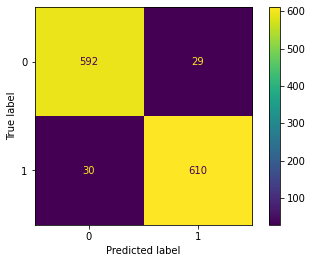

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">ROC Curve

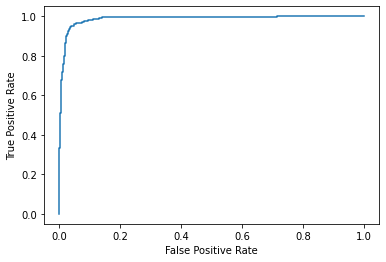

In [69]:
decision_scores = pac.decision_function(tfidf_test)
fpr, tpr, thresholds_roc = roc_curve(y_test, decision_scores)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Precision Recall Curve

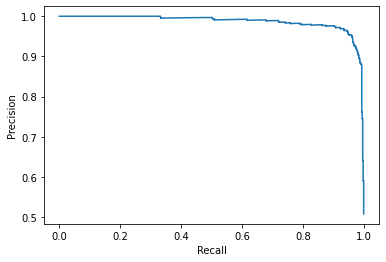

In [65]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, decision_scores)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

<br><h2 style="font-size: 24px; text-align: center; color: blue;">Multi-layer Perceptron (MLP) Classifier</h2>

In [70]:
mlpc = MLPClassifier()
mlpc.fit(tfidf_train,y_train)
y_pred=mlpc.predict(tfidf_test)

print('Accuracy: ', round(accuracy_score(y_test,y_pred)*100, 2))
print('Precision: ', round(precision_score(y_test,y_pred)*100, 2))
print('Recall: ', round(recall_score(y_test,y_pred)*100, 2))
print('F1-Score: ', round(f1_score(y_test,y_pred)*100, 2))

Accuracy:  95.48
Precision:  96.2
Recall:  94.84
F1-Score:  95.52


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Confusion Matrix

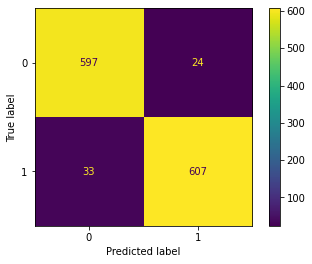

In [75]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">ROC Curve

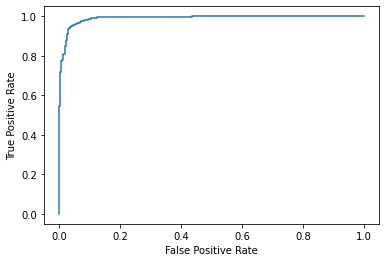

In [78]:
y_score = mlpc.predict_proba(tfidf_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=mlpc.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Precision Recall Curve

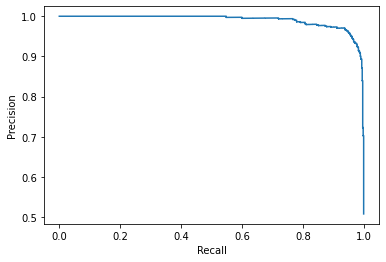

In [80]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=mlpc.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Loss Curve

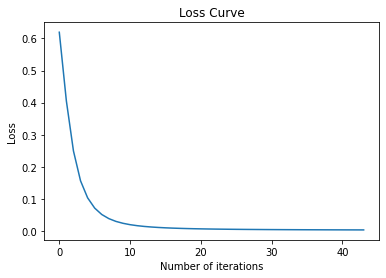

In [82]:
plt.plot(mlpc.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

<br><h2 style="font-size: 24px; text-align: center; color: blue;">Random Forest Classifier</h2>

In [83]:
rfc = RandomForestClassifier()
rfc.fit(tfidf_train,y_train)
y_pred=rfc.predict(tfidf_test)

print('Accuracy: ', round(accuracy_score(y_test,y_pred)*100, 2))
print('Precision: ', round(precision_score(y_test,y_pred)*100, 2))
print('Recall: ', round(recall_score(y_test,y_pred)*100, 2))
print('F1-Score: ', round(f1_score(y_test,y_pred)*100, 2))

Accuracy:  93.81
Precision:  93.91
Recall:  93.91
F1-Score:  93.91


<h2 style="font-size: 24px; text-align: center; font-style: italic;">Confusion Matrix

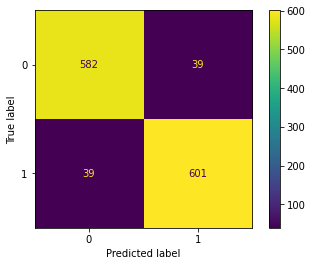

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">ROC Curve

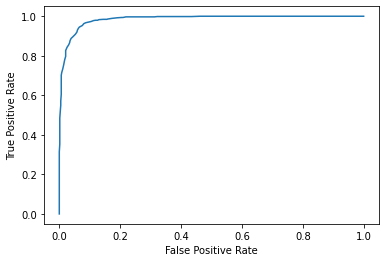

In [85]:
y_score = rfc.predict_proba(tfidf_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=rfc.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

<h2 style="font-size: 24px; text-align: center; font-style: italic;">Precision Recall Curve

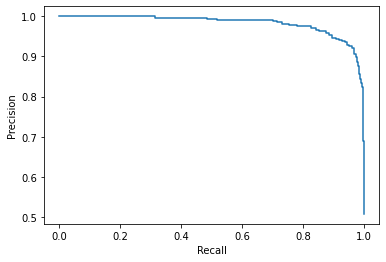

In [86]:
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=rfc.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

<br><h2 style="font-size: 28px; text-align: center; color: red">End</h1>